In [2]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Flatten,Dense,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os,shutil,random,glob
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [3]:
#to set processer to gpu
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print('Num GPU Available:',len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPU Available: 1


# data preparation

In [6]:
#changing the directory to where the image dataset is there
os.chdir('C:\\Users\\prave\\jupiter notebook\\prashu\\FamilyMembers')
#making sub folder i.e train/test/valid from the raw image folder
if os.path.isdir('train') is False:
    os.makedirs('train/father')
    os.makedirs('train/mother')
    os.makedirs('train/brother')
    os.makedirs('train/sister') 
if os.path.isdir('test') is False:
    os.makedirs('test/father')
    os.makedirs('test/mother')
    os.makedirs('test/brother')
    os.makedirs('test/sister')
if os.path.isdir('valid') is False:
    os.makedirs('valid/father')
    os.makedirs('valid/mother')
    os.makedirs('valid/brother')
    os.makedirs('valid/sister') 
#spliting the image data to train/test/valid
#=>train
print(len(os.listdir('father')))
for n in random.sample(glob.glob('father/father*'),180):
    shutil.move(n,'train/father')
#print('father ok')
for n in random.sample(glob.glob('mother/mother*'),180):
    shutil.move(n,'train/mother')
#print('mother ok')
for n in random.sample(glob.glob('brother/brother*'),180):
    shutil.move(n,'train/brother')
#print('brother ok')
for n in random.sample(glob.glob('sister/sister*'),180):
    shutil.move(n,'train/sister')
#print('sis ok')
#=>test
for n in random.sample(glob.glob('father/father*'),10):
    shutil.move(n,'test/father')
for n in random.sample(glob.glob('mother/mother*'),10):
    shutil.move(n,'test/mother')
for n in random.sample(glob.glob('brother/brother*'),10):
    shutil.move(n,'test/brother')
for n in random.sample(glob.glob('sister/sister*'),10):
    shutil.move(n,'test/sister')
#=>valid
for n in random.sample(glob.glob('father/father*'),10):
    shutil.move(n,'valid/father')
for n in random.sample(glob.glob('mother/mother*'),10):
    shutil.move(n,'valid/mother')
for n in random.sample(glob.glob('brother/brother*'),10):
    shutil.move(n,'valid/brother')
for n in random.sample(glob.glob('sister/sister*'),10):
    shutil.move(n,'valid/sister')
#chaning directory to current working dir
os.chdir('../../')
print('success2')

201
mother ok
brother ok
sis ok
success2


In [7]:
train_path='C:\\Users\\prave\\jupiter notebook\\prashu\\FamilyMembers\\train'
test_path ='C:\\Users\\prave\\jupiter notebook\\prashu\\FamilyMembers\\test'
valid_path='C:\\Users\\prave\\jupiter notebook\\prashu\\FamilyMembers\\valid'

# image data Generator to feed into neural networks
###1).all images are resized to equal size(i.e by target_size func)



#2).we also declare classes or labels here (i.e by classes=[declare ur classes here])

In [34]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(124,124),classes=['father','mother','brother','sister'],batch_size=30)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path,target_size=(124,124),classes=['father','mother','brother','sister'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(124,124),classes=['father','mother','brother','sister'],batch_size=10,shuffle=True)

Found 720 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [35]:
assert train_batches.n==720
assert valid_batches.n==40
assert test_batches.n ==40
assert train_batches.num_classes== valid_batches.num_classes== test_batches.num_classes==4

In [36]:
images,labels=next(train_batches)
print(labels)
#print(len(os.listdir(train_path)))
images.shape

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


(30, 124, 124, 3)

In [37]:
#plot images in a single batch
def plotImages(imgs_arr):
    fig,axes=plt.subplots(2,10,figsize=(5,5))
    axes=axes.flatten()
    for img,ax in zip(imgs_arr,axes):
        ax.imshow(img,cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

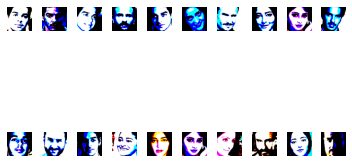

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [38]:
plotImages(images)
print(labels)

# building and train a cnn

In [10]:
#labels= tf.reshape(labels, [16, 1])

In [40]:
model=Sequential([
    ###.......feature extraction and reduction(Conv2D and Maxpooling)
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(124,124,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    ###......NEURAL NETWORK CONSTRUCTION..........###
    Flatten(),
    Dense(180,activation='relu'),
    Dense(units=4,activation='softmax')
])

In [41]:
m=model
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 124, 124, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 180)               11070900  
_________________________________________________________________
dense_2 (Dense)              (None, 4)                

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(train_batches,validation_data=valid_batches, epochs=10,verbose=2)

Epoch 1/10
24/24 - 3s - loss: 260.9164 - accuracy: 0.4000 - val_loss: 0.6968 - val_accuracy: 0.7750
Epoch 2/10
24/24 - 2s - loss: 0.3188 - accuracy: 0.9083 - val_loss: 0.0842 - val_accuracy: 0.9500
Epoch 3/10
24/24 - 2s - loss: 0.0400 - accuracy: 0.9903 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 4/10
24/24 - 1s - loss: 0.0095 - accuracy: 0.9986 - val_loss: 6.0176e-04 - val_accuracy: 1.0000
Epoch 5/10
24/24 - 1s - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
24/24 - 1s - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/10
24/24 - 1s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 8/10
24/24 - 2s - loss: 0.0153 - accuracy: 0.9944 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 9/10
24/24 - 2s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 10/10
24/24 - 2s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000


In [44]:
T_images,T_labels=next(test_batches)
print(T_labels)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [45]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [46]:
prediction=model.predict(x=test_batches,verbose=0)
np.round(prediction)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]],

In [61]:
prediction=model.predict(x=T_images[4].reshape(-1,124,124,3),verbose=0)

In [62]:
c={'father':1,'mother':2,'brother':3,'sister':4}
#c.keys =['father','mother','brother','sister']
l=[]
for i in prediction[0]:
    l.append(np.round(i,4))
    print(np.round(i,4))
print('max:',max(l))

0.0
0.0
1.0
0.0
max: 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


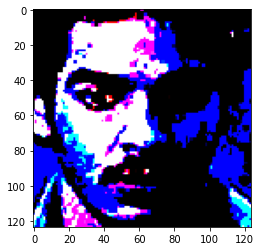

In [63]:
plt.imshow(T_images[4])

In [64]:
tf.keras.models.save_model(model,'..\\familyMemberRecognition')

INFO:tensorflow:Assets written to: ..\familyMemberRecognition\assets


In [65]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [22]:
loaded_2 = keras.models.load_model("my_model")
#np.testing.assert_allclose(loaded_2(input_arr), outputs)